# Making a map using the on-demand mapping services for a basemap and super-imposing some data

## Background 

The most familiar mapping services are those we often use to navigate with our phones for example: google maps. The difference between google maps and many of the examples we have looked at so far is that we do not download data in advance, process it and then create a map. Instead we have access to data when we need it and a a _relevant_ resolution. If we want to make a global map that is 1000 pixels across then Australia is probably just a few dozen pixels wide. If we instead decide to make a map to navigate across Melbourne, then a much higher resolution is needed _but only within the boundary of the map_. 

`Cartopy` provides access to various of the online mapping services that will serve image data on demand in the form of small image tiles at a specified resolution. The tools automatically query the service and assemble the tiles to make the map but there are some tricks that we need to know before we can use them.

## Exercise

This notebook is a template that needs to have some functions defined that it can use to plot the map.

Your job is to provide those functions so that this notebook will work. You are not going to change this notebook at all !

In [1]:
from src.dependencies import *
from src.my_functions import *

In [2]:
display_markdown(my_documentation(), raw=True)

   
# Map Maker Program
    
## Introduction

The map maker program is a friendly seismic event map generator that can be run by anyone using python.
This map maker utilsies the IRIS seismic moniotring station data, various basemaps and Earthbyters 
ocean seafloor age data to visualize sesimic events on the globe. Users can define when and where they
want to analyse and what basemaps are most useful to their study.

## Using the program

Using this program is very simple, all it requires is the user to download the map_maker notebad from 
our Git repository. The notebook will open up, and comments will prompt users where they need to input
their parameters. There are five areas where the user will need to input data. These are:

### latitude and longitude
Input the lats and lons of the bounding box you want to study. These are the North(lat1), East(lon1),
South(lat0), West (lon0).

```python
# Simply change the values next to the equals sign!
lat0 =  30  ; lat1 = 40
lon0 =  -123; lon1 = -113
```

### basemap_name
Input what basemap you would like to display in the final product. To find the list of basemaps you can choose from run the code line:

```python
map_tiles_dictionary = my_basemaps()
map_tiles_dictionary.keys()
```
``` 
```
You must copy the basemap name in quotation marks for this code to excute



### my_coastline and my_water_features
Input the resolution you want these features to be presented as. Call ```help(my_coastline)``` to see the resolution options. 

### point_data
Input the range (start and end) and minimum magnitude of seismic events want to work with, leave map_extent.

### Run the code
Once the required information has been inputted the user needs to simply run the code, and a .png image will be saved with the seismic event map.

## Getting help
If you require additional help, all the functions in this notebook have handy hints to look at. Simple call ```help("the function you need help with")``` 
to print function documentation.



## The code !

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
map_tiles_dictionary = my_basemaps()

In [5]:
# Specify a region of interest.Input values in the lat and lon variables below that you wish to study in.

lat0 =  30  ; lat1 = 40
lon0 =  -123; lon1 = -113

map_extent = [lon0, lon1, lat0, lat1]

#Use the map_tiles_dictionary or my_basemaps functions to see which basemaps options can be chosen. You can print map_tiles_dictionary.keys() in the empty cell below to see basemap names.
basemap_name = "mapbox_outdoors"

In [6]:
map_tiles_dictionary.keys()

dict_keys(['open_street_map', 'mapbox_outdoors', 'mapbox_satellite', 'mapbox_satellite_streets', 'stamen_terrain'])

In [7]:
# Call the my_coastline function and input the target resolution for the coastline feature. Call help(my_coastline) to see the resolution options. 
coastline = my_coastlines("10m")
# Call the my_water_features function and input the target resolution for the water features. Call help(my_water_features) to see the resolution options. 
water_features = my_water_features("50m")

Chosen coastline resolution is: 10m
Chosen water features resolution is: 50m


In [8]:
help(my_coastlines)

Help on function my_coastlines in module src.my_functions:

my_coastlines(resolution)
    This function generates coastline edges at a specified resolution
    Parameters
    ----------
    resolution : string
        the resolutions that can be chosen are "10m", "50m", or "110m"
    
    Returns
    -------
    cartopy.feature : cartopyfeature.COASTLINE object at specifed resolution



In [9]:
# Specify the date range (start and end) and minimum magnitude of seismic events want to work with, leave map_extent.
point_data = my_point_data(map_extent,"1975-01-01","2022-01-01", 4)

print(point_data)

Point data: 2751 events in catalogue
[[-113.6408   30.0008    4.1       3.    ]
 [-113.7587   30.0098    4.6       3.    ]
 [-113.6182   30.0752    4.6       3.    ]
 ...
 [-118.2834   32.4429    5.1       3.    ]
 [-120.6875   35.7466    4.5       3.    ]
 [-117.7167   33.507     4.3       3.    ]]


In [10]:
raster = my_global_raster_data()

print(raster)

[[[-180.         90.         55.569202]
  [-179.9        90.         55.56879 ]
  [-179.8        90.         55.568138]
  ...
  [ 179.8        90.         55.416157]
  [ 179.9        90.         55.416164]
  [ 180.         90.         55.41626 ]]

 [[-180.         89.9        55.370914]
  [-179.9        89.9        55.371075]
  [-179.8        89.9        55.361431]
  ...
  [ 179.8        89.9        55.363701]
  [ 179.9        89.9        55.363701]
  [ 180.         89.9        55.3643  ]]

 [[-180.         89.8        55.566631]
  [-179.9        89.8        55.547897]
  [-179.8        89.8        55.605961]
  ...
  [ 179.8        89.8        55.555347]
  [ 179.9        89.8        55.561535]
  [ 180.         89.8        55.566044]]

 ...

 [[-180.        -89.8              nan]
  [-179.9       -89.8              nan]
  [-179.8       -89.8              nan]
  ...
  [ 179.8       -89.8              nan]
  [ 179.9       -89.8              nan]
  [ 180.        -89.8              nan]]

 [

In [11]:
## specify some shapefile data (?)

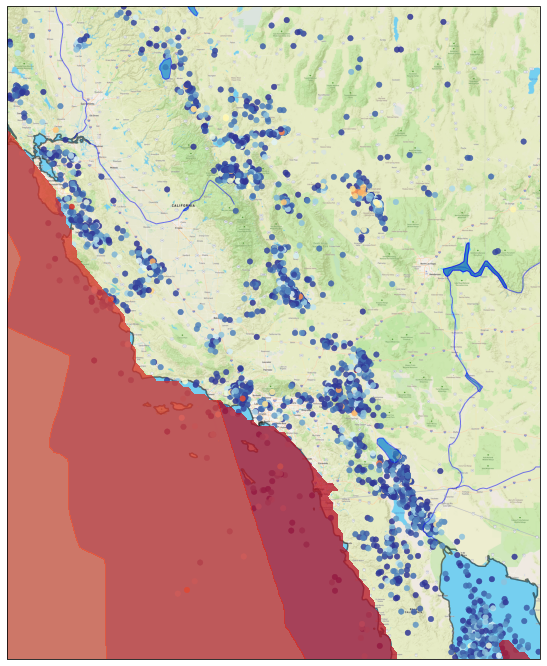

In [12]:
map_tiles = map_tiles_dictionary[basemap_name]

fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)
# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 8)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1, alpha=0.5)
for feature in water_features:
    ax.add_feature(feature,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)
    
## Add point data (lon, lat,colormapped variable, size variable)
ax.scatter(point_data[:,0], point_data[:,1], 10.0* point_data[:,3], c=point_data[:,2], marker='o', 
               cmap=cm.RdYlBu_r, alpha = 0.85, linewidth=0.5, transform=ccrs.Geodetic())


## Add raster data as contours

cf = ax.contourf(raster[:,:,0], raster[:,:,1], raster[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)



In [13]:
fig.savefig("LA_Basin_Map.png", dpi=600)

See how well that worked by opening the [full-size image](./LA_Basin_Map.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.